In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# load files
file_to_load = "resources/movie_budget.csv"
inflation = "resources/inflation.csv"
oscars= 'resources/the_oscar_award(version 2).csv'


In [2]:
# Read main movie file and store into Pandas data frame
raw_data = pd.read_csv(file_to_load)
raw_data.head()

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,25-May,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,22-Dec,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,9-Nov,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,15-Jun,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,6-Jul,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...


In [3]:
#extract the info we want from movie file
clean_data = raw_data[['title', 'year', 'release_date', 'mpaa', 'director', 'writer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget','domestic', 'international', 'worldwide', 'genre_1', 'genre_2', 'genre_3', 'genre_4']]
clean_data                    

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,Playing with Fire,2019,7-Nov,PG,Andy Fickman,Dan Ewen,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


In [4]:
#remove movies with no worldwide revenue 
movie_data = clean_data.dropna(subset=['worldwide'])
movie_data

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,Playing with Fire,2019,7-Nov,PG,Andy Fickman,Dan Ewen,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


# Adjust for Inflation

In [5]:
#load in our inflation adjustment values to show everything in 2022 dollars
inflation_mult = pd.read_csv(inflation)
inflation_mult

inflation_mult["Multiplier"]=inflation_mult["Multiplier"] +1
inflation_mult

,year,Multiplier
0,1990,1.98
1,1991,1.90
2,1992,1.84
3,1993,1.79
4,1994,1.75
5,1995,1.70
6,1996,1.65
7,1997,1.61
8,1998,1.59
9,1999,1.55


In [6]:

inflation_clean = inflation_mult[["year", "Multiplier"]]
inflation_clean

inflation_cleaner = inflation_clean.dropna()
inflation_cleaner


,year,Multiplier
0,1990,1.98
1,1991,1.90
2,1992,1.84
3,1993,1.79
4,1994,1.75
5,1995,1.70
6,1996,1.65
7,1997,1.61
8,1998,1.59
9,1999,1.55


In [7]:
#empty lists
titles = []

budgets = []
adjusted_budgets = []

domestics = []
adjusted_domestics = []

internationals = []
adjusted_internationals = []

worldwides = []
adjusted_worldwides = []

#budget
i = 0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for budget in year_movie['budget']:
        adjusted_budget=budget*inflation_cleaner.iloc[i,1]
        budgets.append(budget)
        adjusted_budgets.append(adjusted_budget)
    i+=1
#domestic
i = 0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for domestic in year_movie['domestic']:
        adjusted_domestic=domestic*inflation_cleaner.iloc[i,1]
        domestics.append(domestic)
        adjusted_domestics.append(adjusted_domestic)
    i+=1
#international
i=0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for international in year_movie['international']:
        adjusted_international=international*inflation_cleaner.iloc[i,1]
        internationals.append(international)
        adjusted_internationals.append(adjusted_international)
    i+=1

#worldwide
i=0 
for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for worldwide in year_movie['worldwide']:
        adjusted_worldwide=worldwide*inflation_cleaner.iloc[i,1]
        worldwides.append(worldwide)
        adjusted_worldwides.append(adjusted_worldwide)
    i+=1
i=0
for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for title in year_movie['title']:
        titles.append(title)
        

#if movie_data.loc["year"] in inflation_cleaner.loc["year"]
       # multiplier = inflation_cleaner[row.loc["year"]]
            #print(year_movie[f'{movie}'])
#print(adjusted_worldwides)

In [8]:
adjusted_df = pd.DataFrame({"title":titles, 
                             "Adjusted Budget":adjusted_budgets, 
                             "Adjusted Domestic":adjusted_domestics, 
                             "Adjusted International":adjusted_internationals, 
                             "Adjusted Worldwide":adjusted_worldwides})
adjusted_df


,title,Adjusted Budget,Adjusted Domestic,Adjusted International,Adjusted Worldwide
0,Back to the Future Part III,79200000.0,1.747896e+08,3.125760e+08,4.873656e+08
1,The Bonfire of the Vanities,93060000.0,3.106856e+07,NaN,3.106856e+07
2,Dances with Wolves,43560000.0,3.647335e+08,4.752000e+08,8.399335e+08
3,Dick Tracy,93060000.0,2.054027e+08,1.168200e+08,3.222227e+08
4,Die Hard 2,138600000.0,2.327311e+08,2.429588e+08,4.756899e+08
...,...,...,...,...,...
3217,Queen & Slim,18180000.0,4.424639e+07,3.718060e+06,4.796445e+07
3218,Midsommar,9090000.0,2.770062e+07,1.965858e+07,4.735920e+07
3219,Knives Out,40400000.0,1.670169e+08,1.453083e+08,3.123251e+08
3220,Unplanned,6060000.0,1.919516e+07,2.067274e+06,2.126243e+07


In [9]:
#if loc["year"] = 1990:
#if the value of the year column = the key of the inflation multiplier dictionary, then multiply the value in column ""
#budget" "domestic", "international", "worldwide" by the value in the dictionary

#other option: instead of having a multiplier column, create a dictionary of inflation 
#use loc to locate (one is index) to locate specific values in a column 
#for loop if 

#for row in movie_data:
  # if row.loc["year"] in inflation_cleaner.loc["year"]
       # multiplier = inflation_cleaner[row.loc["year"]]

In [10]:
#movie_data

In [11]:
#Merging Adjusted Revenues back to main DF
adjusted_df = pd.merge(movie_data, adjusted_df, on="title")
adjusted_df

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,...,international,worldwide,genre_1,genre_2,genre_3,genre_4,Adjusted Budget,Adjusted Domestic,Adjusted International,Adjusted Worldwide
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,...,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,79200000.0,1.747896e+08,3.125760e+08,4.873656e+08
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,...,NaN,15691192.0,Comedy,Drama,Romance,NaN,93060000.0,3.106856e+07,NaN,3.106856e+07
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,...,240000000.0,424208848.0,Adventure,Drama,Western,NaN,43560000.0,3.647335e+08,4.752000e+08,8.399335e+08
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,...,59000000.0,162738726.0,Action,Comedy,Crime,Music,93060000.0,2.054027e+08,1.168200e+08,3.222227e+08
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,...,122706486.0,240247433.0,Action,Thriller,NaN,NaN,138600000.0,2.327311e+08,2.429588e+08,4.756899e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,Queen & Slim,2019,27-Nov,R,Melina Matsoukas,Lena Waithe,NaN,Tat Radcliffe,Daniel Kaluuya,Jodie Turner-Smith,...,3681248.0,47489558.0,Crime,Drama,Romance,NaN,18180000.0,4.424639e+07,3.718060e+06,4.796445e+07
3273,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,...,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller,9090000.0,2.770062e+07,1.965858e+07,4.735920e+07
3274,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,...,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery,40400000.0,1.670169e+08,1.453083e+08,3.123251e+08
3275,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,...,2046806.0,21051915.0,Biography,Drama,NaN,NaN,6060000.0,1.919516e+07,2.067274e+06,2.126243e+07


In [12]:
#Refining our Main DF, removing non adjusted columns
movies_df = adjusted_df[['year','title','director','writer','mpaa','main_actor_1','main_actor_2','main_actor_3','main_actor_4','genre_1','genre_2','genre_3','genre_4','Adjusted Worldwide', 'Adjusted Domestic', 'Adjusted International', 'Adjusted Budget']]
movies_df

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,NaN,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,Comedy,Sci-Fi,Western,4.873656e+08,1.747896e+08,3.125760e+08,79200000.0
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,Drama,Romance,NaN,3.106856e+07,3.106856e+07,NaN,93060000.0
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,NaN,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,Drama,Western,NaN,8.399335e+08,3.647335e+08,4.752000e+08,43560000.0
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,Comedy,Crime,Music,3.222227e+08,2.054027e+08,1.168200e+08,93060000.0
4,1990,Die Hard 2,Renny Harlin,Walter Wager,NaN,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,Action,Thriller,NaN,NaN,4.756899e+08,2.327311e+08,2.429588e+08,138600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2019,Queen & Slim,Melina Matsoukas,Lena Waithe,R,Daniel Kaluuya,Jodie Turner-Smith,Bokeem Woodbine,Chloë Sevigny,Crime,Drama,Romance,NaN,4.796445e+07,4.424639e+07,3.718060e+06,18180000.0
3273,2019,Midsommar,Ari Aster,Ari Aster,R,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,Drama,Horror,Mystery,Thriller,4.735920e+07,2.770062e+07,1.965858e+07,9090000.0
3274,2019,Knives Out,Rian Johnson,Rian Johnson,PG-13,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy,Crime,Drama,Mystery,3.123251e+08,1.670169e+08,1.453083e+08,40400000.0
3275,2019,Unplanned,Chuck Konzelman,Abby Johnson,R,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,Biography,Drama,NaN,NaN,2.126243e+07,1.919516e+07,2.067274e+06,6060000.0


In [13]:
pd.options.display.float_format = '${:,.1f}'.format
movies_df

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,NaN,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,Comedy,Sci-Fi,Western,"$487,365,615.0","$174,789,614.3","$312,576,000.7","$79,200,000.0"
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,Drama,Romance,NaN,"$31,068,560.2","$31,068,560.2",NaN,"$93,060,000.0"
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,NaN,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,Drama,Western,NaN,"$839,933,519.0","$364,733,519.0","$475,200,000.0","$43,560,000.0"
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,Comedy,Crime,Music,"$322,222,677.5","$205,402,677.5","$116,820,000.0","$93,060,000.0"
4,1990,Die Hard 2,Renny Harlin,Walter Wager,NaN,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,Action,Thriller,NaN,NaN,"$475,689,917.3","$232,731,075.1","$242,958,842.3","$138,600,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2019,Queen & Slim,Melina Matsoukas,Lena Waithe,R,Daniel Kaluuya,Jodie Turner-Smith,Bokeem Woodbine,Chloë Sevigny,Crime,Drama,Romance,NaN,"$47,964,453.6","$44,246,393.1","$3,718,060.5","$18,180,000.0"
3273,2019,Midsommar,Ari Aster,Ari Aster,R,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,Drama,Horror,Mystery,Thriller,"$47,359,200.0","$27,700,624.6","$19,658,575.4","$9,090,000.0"
3274,2019,Knives Out,Rian Johnson,Rian Johnson,PG-13,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy,Crime,Drama,Mystery,"$312,325,125.0","$167,016,866.3","$145,308,258.6","$40,400,000.0"
3275,2019,Unplanned,Chuck Konzelman,Abby Johnson,R,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,Biography,Drama,NaN,NaN,"$21,262,434.1","$19,195,160.1","$2,067,274.1","$6,060,000.0"


In [14]:
movies_df.sort_values(by='Adjusted Worldwide', ascending=False)
movies_df

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,NaN,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,Comedy,Sci-Fi,Western,"$487,365,615.0","$174,789,614.3","$312,576,000.7","$79,200,000.0"
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,Drama,Romance,NaN,"$31,068,560.2","$31,068,560.2",NaN,"$93,060,000.0"
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,NaN,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,Drama,Western,NaN,"$839,933,519.0","$364,733,519.0","$475,200,000.0","$43,560,000.0"
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,Comedy,Crime,Music,"$322,222,677.5","$205,402,677.5","$116,820,000.0","$93,060,000.0"
4,1990,Die Hard 2,Renny Harlin,Walter Wager,NaN,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,Action,Thriller,NaN,NaN,"$475,689,917.3","$232,731,075.1","$242,958,842.3","$138,600,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2019,Queen & Slim,Melina Matsoukas,Lena Waithe,R,Daniel Kaluuya,Jodie Turner-Smith,Bokeem Woodbine,Chloë Sevigny,Crime,Drama,Romance,NaN,"$47,964,453.6","$44,246,393.1","$3,718,060.5","$18,180,000.0"
3273,2019,Midsommar,Ari Aster,Ari Aster,R,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,Drama,Horror,Mystery,Thriller,"$47,359,200.0","$27,700,624.6","$19,658,575.4","$9,090,000.0"
3274,2019,Knives Out,Rian Johnson,Rian Johnson,PG-13,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy,Crime,Drama,Mystery,"$312,325,125.0","$167,016,866.3","$145,308,258.6","$40,400,000.0"
3275,2019,Unplanned,Chuck Konzelman,Abby Johnson,R,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,Biography,Drama,NaN,NaN,"$21,262,434.1","$19,195,160.1","$2,067,274.1","$6,060,000.0"


In [15]:
#why is this here?
#movies_df.to_csv('movies_adjusted.csv')

In [16]:
#do we want to trim down movies_df to just 2010 to now to tell more consisitent story?  
#Is anything using info prior to that? 
#budget v rev -yes
#genres- yes
#actors- yes
#actor -yes
#actor/oscar- no
#oscar- yes

# Budget vs Revenue

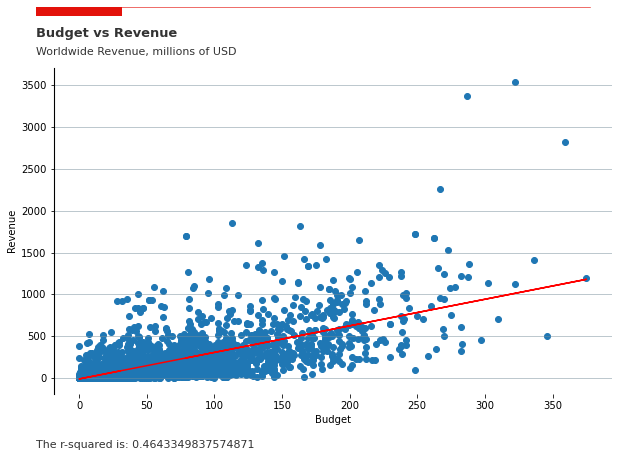

In [17]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(10,6))

# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6)

x_values = movies_df['Adjusted Budget']/1000000
y_values = movies_df['Adjusted Worldwide']/1000000
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(1,8), fontsize=15,color="red")

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)


# Add in line and tag
ax.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

ax.text(x=.1, y=.95, s="Budget vs Revenue", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=.1, y=.91, s="Worldwide Revenue, millions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=.1, y=.00, s=""f"The r-squared is: {rvalue**2}""", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

plt.xlabel('Budget')
#plt.title('Budget vs Revenue')
plt.ylabel('Revenue')
#print(f"The r-squared is: {rvalue**2}")

#plt.savefig("regression.png", bbox_inches='tight')
plt.savefig('images_out/regression.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')

plt.show()

# Analysis by Genre

In [18]:
#because movies were given multiple (relativly arbitrarily ordered) genres, we chose to total the 
#adjusted revenues of any movie assigned a genre

genre = movies_df.groupby("genre_1")
sumgenre = genre.sum()
genre_df = pd.DataFrame(sumgenre)
genre_df.reset_index()

,genre_1,year,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,Action,1903287,"$261,706,492,533.7","$106,007,969,571.1","$155,698,522,960.2","$90,803,800,000.0"
1,Adventure,636431,"$106,750,982,580.4","$41,978,926,496.6","$64,772,056,078.2","$29,108,920,000.0"
2,Animation,64214,"$10,183,261,185.2","$4,717,912,384.4","$5,465,348,800.8","$2,377,982,500.0"
3,Biography,365469,"$18,561,922,308.0","$9,671,962,154.4","$8,889,960,153.6","$7,064,853,910.2"
4,Comedy,1742346,"$88,929,530,300.1","$50,818,555,844.5","$38,110,974,455.6","$33,283,069,110.1"
5,Crime,417088,"$19,944,834,588.8","$9,977,806,729.3","$9,967,027,859.5","$7,762,793,840.0"
6,Documentary,36140,"$870,464,401.7","$435,100,873.0","$435,363,528.7","$204,756,007.0"
7,Drama,1027217,"$51,404,239,958.3","$24,444,895,181.5","$26,959,344,776.8","$18,845,385,250.0"
8,Family,8031,"$2,199,720,602.8","$968,352,694.8","$1,231,367,908.0","$271,660,000.0"
9,Fantasy,20029,"$1,451,251,398.9","$782,476,177.2","$668,775,221.7","$573,460,000.0"


In [19]:
genre2 = movies_df.groupby("genre_2").sum()
genre3 = movies_df.groupby("genre_3").sum()
genre4 = movies_df.groupby("genre_4").sum()
genre4["Adjusted Worldwide"]=genre4["Adjusted Worldwide"]/1000000000

In [20]:
add1 = genre_df.add(genre2, fill_value=0)
add2 = add1.add(genre3, fill_value=0) 
add3 = add2.add(genre4, fill_value=0)
add3["Adjusted Worldwide"]=add3["Adjusted Worldwide"]/1000000000


In [21]:
#bar_chart = genre_df.plot.bar(y="Adjusted Worldwide")
#bar_chart2 = add3.plot.bar(y="Adjusted Worldwide", legend=None)
#bar_chart.yaxis.set_major_formatter('${x:1,.2f}')
#bar_chart2.yaxis.set_major_formatter('${x:1,.2f}')
#plt.title("Worldwide Revenue by Genre")
#plt.ylabel("Revenue in Billions")
#plt.xlabel("Genre")
#plt.savefig("images_out/genre-old.png", bbox_inches='tight')

In [22]:
#keep this here before graphing
add3=add3.reset_index()
add3

,index,year,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,Action,"$1,903,287.0",$261.7,"$106,007,969,571.1","$155,698,522,960.2","$90,803,800,000.0"
1,Adventure,"$1,524,163.0",$289.6,"$111,641,786,121.3","$177,920,216,678.2","$86,091,132,700.0"
2,Animation,"$427,785.0",$83.5,"$33,236,381,470.2","$50,215,603,655.5","$21,744,412,000.0"
3,Biography,"$421,699.0",$21.7,"$11,170,243,323.8","$10,532,627,102.3","$9,067,481,910.2"
4,Comedy,"$2,689,987.0",$200.5,"$101,944,407,400.8","$103,711,316,684.1","$70,269,969,110.1"
5,Crime,"$1,225,602.0",$66.9,"$35,821,447,093.3","$35,473,591,836.0","$29,473,260,840.0"
6,Documentary,"$72,248.0",$1.6,"$974,257,373.4","$611,554,864.9","$330,905,967.2"
7,Drama,"$3,226,128.0",$185.1,"$91,343,195,687.5","$101,066,094,792.6","$71,292,735,090.0"
8,Family,"$861,114.0",$62.6,"$53,976,787,308.4","$73,386,524,241.6","$37,350,904,150.0"
9,Fantasy,"$764,884.0",$82.1,"$44,794,473,056.5","$66,118,811,458.1","$35,413,947,500.0"


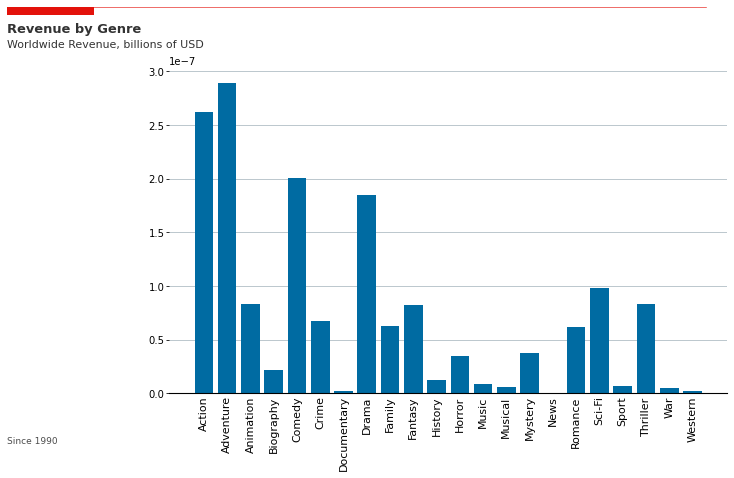

In [23]:
# Setup plot size. (w, h)- this also 
fig, ax = plt.subplots(figsize=(10,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Add in line and tag
ax.plot([-.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Make bottom spine slightly thicker
ax.spines['bottom'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.1)


# Plot data
ax.bar(add3["index"],add3["Adjusted Worldwide"]/1000000000, color='#006BA2', zorder=2)


# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=False,      # Put x-axis labels on top
                         labelbottom=True,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,
                         labelrotation=90, # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
#ax.set_yticklabels ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=1,            # Pad tick labels so they don't go over y-axis
                         bottom=True)       # Set no ticks on bottom/left



ax.text(x=-.1, y=.96, s="Revenue by Genre", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.1, y=.925, s="Worldwide Revenue, billions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=-.1, y=.01, s="""Since 1990""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

plt.savefig('images_out/rev_by_genre.png',    # Set path and filename
            dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')                  # Set background color to white

plt.show()

# Top Actor Analysis

In [24]:
num_of_movies = movies_df.groupby('main_actor_1').count().sort_values('title', ascending=False)['title']
total_revenue1 = movies_df.groupby('main_actor_1').sum().sort_values('Adjusted Worldwide', ascending=False)[['Adjusted Domestic','Adjusted International','Adjusted Worldwide']]
total_revenue1['Number of movies'] = num_of_movies
total_revenue1.head(20)

,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies
main_actor_1,,,,
Tom Hanks,"$5,142,325,677.2","$6,357,893,567.8","$11,500,219,245.0",25
Tom Cruise,"$4,112,479,320.7","$7,368,663,466.5","$11,481,142,787.2",26
Will Smith,"$4,333,759,571.5","$6,143,636,440.1","$10,477,396,011.6",22
Robert Downey Jr.,"$3,753,356,356.7","$6,154,197,350.1","$9,907,553,706.8",12
Johnny Depp,"$3,244,849,891.2","$5,768,736,910.9","$9,013,586,802.1",25
Leonardo DiCaprio,"$3,106,616,751.9","$5,767,242,618.7","$8,873,859,370.6",16
Daniel Radcliffe,"$2,302,290,387.0","$4,983,027,545.3","$7,285,317,940.3",6
Vin Diesel,"$2,153,727,636.4","$4,753,147,550.5","$6,906,875,186.9",15
Dwayne Johnson,"$2,326,721,075.6","$3,900,544,304.6","$6,227,265,380.2",19


In [25]:
num_of_movies = movies_df.groupby('main_actor_2').count().sort_values('title', ascending=False)['title']
total_revenue2 = movies_df.groupby('main_actor_2').sum().sort_values('Adjusted Worldwide', ascending=False)[['Adjusted Domestic','Adjusted International','Adjusted Worldwide']]
total_revenue2['Number of movies'] = num_of_movies
total_revenue2.head(20)

,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies
main_actor_2,,,,
Chris Evans,"$2,335,824,189.8","$4,198,787,940.6","$6,534,612,130.4",7
Samuel L. Jackson,"$2,407,527,656.2","$3,645,832,345.8","$6,053,360,001.9",15
Emma Watson,"$1,717,835,394.1","$3,273,105,802.8","$4,990,941,202.0",7
Zoe Saldana,"$1,497,369,924.2","$3,021,317,382.5","$4,518,687,306.8",5
Kate Winslet,"$1,429,618,486.4","$2,938,846,888.8","$4,368,465,375.1",9
Kirsten Dunst,"$1,818,527,772.6","$2,307,579,650.7","$4,126,107,423.3",7
Paul Walker,"$1,374,325,464.4","$2,740,947,840.8","$4,115,273,305.2",7
Jeremy Irons,"$1,482,055,236.5","$2,559,923,405.8","$4,041,978,642.3",4
Robert Pattinson,"$1,629,704,888.9","$2,335,267,862.9","$3,964,972,751.9",7


In [26]:
num_of_movies = movies_df.groupby('main_actor_3').count().sort_values('title', ascending=False)['title']
total_revenue3 = movies_df.groupby('main_actor_3').sum().sort_values('Adjusted Worldwide', ascending=False)[['Adjusted Domestic','Adjusted International','Adjusted Worldwide']]
total_revenue3['Number of movies'] = num_of_movies
total_revenue3.head(20)

,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies
main_actor_3,,,,
Mark Ruffalo,"$1,743,087,571.6","$3,541,333,504.0","$5,284,421,075.6",8
Dwayne Johnson,"$1,242,659,389.9","$3,519,002,616.8","$4,761,662,006.8",6
Rupert Grint,"$1,460,083,486.8","$3,134,954,121.2","$4,595,037,613.2",5
Scarlett Johansson,"$1,633,429,347.8","$2,505,710,509.6","$4,139,139,857.4",9
Seth Rogen,"$1,463,968,501.4","$2,194,569,111.6","$3,658,537,612.9",5
Billy Zane,"$1,061,575,949.8","$2,471,471,712.8","$3,533,047,662.6",1
Sigourney Weaver,"$1,036,624,897.9","$2,468,516,821.0","$3,505,141,718.9",4
Jeff Goldblum,"$1,369,464,028.5","$2,129,531,557.7","$3,498,995,586.2",4
Taylor Lautner,"$1,371,797,605.6","$2,076,392,036.4","$3,448,189,641.9",4


In [27]:
num_of_movies = movies_df.groupby('main_actor_4').count().sort_values('title', ascending=False)['title']
total_revenue4 = movies_df.groupby('main_actor_4').sum().sort_values('Adjusted Worldwide', ascending=False)[['Adjusted Domestic','Adjusted International','Adjusted Worldwide']]
total_revenue4['Number of movies'] = num_of_movies
total_revenue4.head(20)

,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies
main_actor_4,,,,
Michelle Rodriguez,"$1,424,717,747.9","$4,137,313,500.7","$5,562,031,248.6",3
Chris Hemsworth,"$1,367,273,126.1","$2,987,563,839.6","$4,354,836,965.8",2
Orlando Bloom,"$1,208,949,100.2","$2,613,873,405.0","$3,822,822,505.2",3
Kathy Bates,"$1,216,516,199.9","$2,600,624,404.8","$3,817,140,604.8",5
Josh Gad,"$1,395,112,682.9","$2,202,135,169.5","$3,597,247,852.4",3
Whoopi Goldberg,"$1,288,946,033.2","$2,079,462,453.5","$3,368,408,486.7",2
Chiwetel Ejiofor,"$1,288,946,033.2","$2,079,462,453.5","$3,368,408,486.7",2
Stanley Tucci,"$1,188,755,968.7","$1,737,293,367.2","$2,926,049,335.9",7
Domhnall Gleeson,"$1,233,428,962.0","$1,617,990,668.7","$2,851,419,630.8",3


In [28]:
add1 = total_revenue1.add(total_revenue2, fill_value=0)
add2 = add1.add(total_revenue3, fill_value=0) 
add3 = add2.add(total_revenue4, fill_value=0)
add3["Per Movie"]=add3["Adjusted Worldwide"]/add3["Number of movies"]
ww = add3.sort_values('Adjusted Worldwide', ascending = False).head(15)
ww

,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies,Per Movie
Robert Downey Jr.,"$4,859,135,381.6","$7,842,760,330.1","$12,701,895,711.7",$20.0,"$635,094,785.6"
Tom Hanks,"$5,580,381,916.5","$6,791,366,807.4","$12,371,748,723.9",$29.0,"$426,612,025.0"
Will Smith,"$5,083,529,681.7","$7,254,189,212.4","$12,337,718,894.1",$25.0,"$493,508,755.8"
Tom Cruise,"$4,340,218,417.4","$7,599,480,466.5","$11,939,698,883.9",$28.0,"$426,417,817.3"
Samuel L. Jackson,"$5,018,050,431.9","$6,813,052,628.5","$11,831,103,060.4",$40.0,"$295,777,576.5"
Dwayne Johnson,"$3,898,487,215.8","$7,843,016,001.8","$11,741,503,217.6",$28.0,"$419,339,400.6"
Johnny Depp,"$4,103,590,938.9","$7,556,926,129.6","$11,660,517,068.5",$31.0,"$376,145,711.9"
Chris Evans,"$3,942,761,761.2","$6,482,596,180.9","$10,425,357,942.0",$19.0,"$548,703,049.6"
Orlando Bloom,"$3,310,376,996.8","$6,338,082,091.0","$9,648,459,087.8",$10.0,"$964,845,908.8"
Cameron Diaz,"$4,056,185,210.2","$5,419,757,908.1","$9,475,943,118.4",$28.0,"$338,426,539.9"


In [29]:
#ww[["Adjusted Domestic", "Adjusted International"]].plot(kind="bar", stacked=True)




In [30]:
#keep this here before plotting
ww=ww.reset_index()
ww.head()

,index,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies,Per Movie
0,Robert Downey Jr.,"$4,859,135,381.6","$7,842,760,330.1","$12,701,895,711.7",$20.0,"$635,094,785.6"
1,Tom Hanks,"$5,580,381,916.5","$6,791,366,807.4","$12,371,748,723.9",$29.0,"$426,612,025.0"
2,Will Smith,"$5,083,529,681.7","$7,254,189,212.4","$12,337,718,894.1",$25.0,"$493,508,755.8"
3,Tom Cruise,"$4,340,218,417.4","$7,599,480,466.5","$11,939,698,883.9",$28.0,"$426,417,817.3"
4,Samuel L. Jackson,"$5,018,050,431.9","$6,813,052,628.5","$11,831,103,060.4",$40.0,"$295,777,576.5"


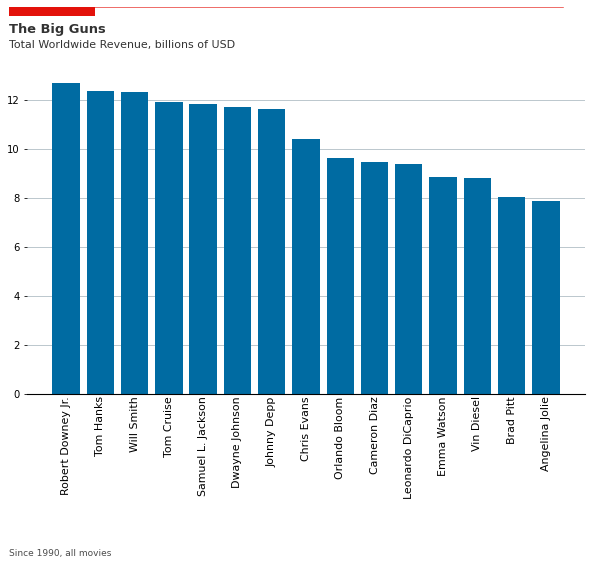

In [31]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(10,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Make bottom spine slightly thicker
ax.spines['bottom'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.1)

# Setup data
actor= ww['index']
revenue = ww["Adjusted Worldwide"]/1000000000

# Plot data
ax.bar(actor, revenue, color='#006BA2', zorder=2)


# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=False,      # Put x-axis labels on top
                         labelbottom=True,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,
                         labelrotation = 90, 
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
#ax.set_yticklabels(gdp_bar['country'],      # Set labels again
#                   ha = 'left')              # Set horizontal alignment to left
#ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
##                         labelsize=11,       # Set label size
#                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
#ax.set_ylim(-0.5, 8.5)

# Add in line and tag
ax.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Set Legend
#ax.legend(['"Adjusted Domestic', 'Adjusted International'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)


# Add in title and subtitle
ax.text(x=.1, y=.96, s="The Big Guns", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=.1, y=.925, s="Total Worldwide Revenue, billions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=.1, y=-.25, s="""Since 1990, all movies""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images_out/actors_bar.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

plt.show()

In [32]:
elite = add3.sort_values('Per Movie', ascending = False).head(15)
elite=elite.reset_index()
elite.head()

,index,Adjusted Domestic,Adjusted International,Adjusted Worldwide,Number of movies,Per Movie
0,Billy Zane,"$1,061,575,949.8","$2,471,471,712.8","$3,533,047,662.6",$1.0,"$3,533,047,662.6"
1,Richard Attenborough,"$721,062,334.8","$1,126,254,397.8","$1,847,316,732.6",$1.0,"$1,847,316,732.6"
2,Jake Lloyd,"$735,544,249.4","$856,433,946.5","$1,591,978,195.9",$1.0,"$1,591,978,195.9"
3,Daisy Ridley,"$2,198,708,657.6","$2,553,033,065.4","$4,751,741,723.0",$3.0,"$1,583,913,907.7"
4,Jonathan Groff,"$926,966,503.8","$1,959,251,231.6","$2,886,217,735.4",$2.0,"$1,443,108,867.7"


In [33]:
#elite=elite.reset_index()
#elite.head()

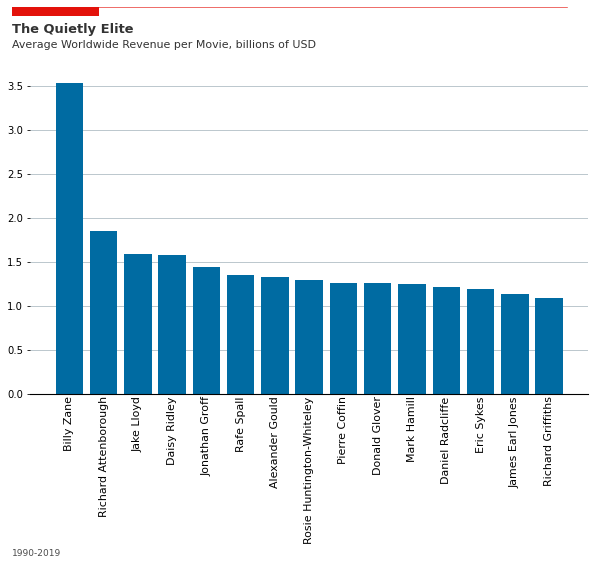

In [34]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(10,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Make left spine slightly thicker
ax.spines['bottom'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.1)

# Setup data
actor= elite['index']
revenue = elite["Per Movie"]/1000000000

# Plot data
ax.bar(actor, revenue, color='#006BA2', zorder=2)

# Set custom labels for x-axis
#ax.set_xticks([0, 5, 10, 15, 20])
#ax.set_xticklabels([0, 5, 10, 15, 20])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=False,      # Put x-axis labels on top
                         labelbottom=True,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,
                         labelrotation = 90, # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
#ax.set_yticklabels(gdp_bar['country'],      # Set labels again
#                   ha = 'left')              # Set horizontal alignment to left
#ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
##                         labelsize=11,       # Set label size
#                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
#ax.set_ylim(-0.5, 8.5)

# Add in line and tag
ax.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Set Legend
#ax.legend(['"Adjusted Domestic', 'Adjusted International'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)


# Add in title and subtitle
ax.text(x=.1, y=.96, s="The Quietly Elite", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=.1, y=.925, s="Average Worldwide Revenue per Movie, billions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=.1, y=-.25, s="""1990-2019""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images_out/quiet_actors_bar.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white

plt.show()

# Oscar Winning Actors

In [53]:
oscars_df = pd.read_csv(oscars)
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,loser,winner_ct,loser_ct,nominees
0,1980,1981,53,ACTOR IN A LEADING ROLE,Robert De Niro,Raging Bull,True,False,2,6,8
1,1980,1981,53,ACTOR IN A SUPPORTING ROLE,Joe Pesci,Raging Bull,False,True,2,6,8
2,1980,1981,53,ACTRESS IN A SUPPORTING ROLE,Cathy Moriarty,Raging Bull,False,True,2,6,8
3,1980,1981,53,CINEMATOGRAPHY,Michael Chapman,Raging Bull,False,True,2,6,8
4,1980,1981,53,DIRECTING,Martin Scorsese,Raging Bull,False,True,2,6,8


In [54]:
oscars_df = oscars_df.rename(columns={"film":"title", 'year_film':'year'})
merge = pd.merge(movies_df, oscars_df, how="inner", on=["title", "year"])

#you wind up with multiple listings for movies with multiple noms
#will regroup when we get to movies below
merge.head()

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,...,Adjusted Budget,year_ceremony,ceremony,category,name,winner,loser,winner_ct,loser_ct,nominees
0,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,ACTOR IN A SUPPORTING ROLE,Al Pacino,False,True,3,4,7
1,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,ART DIRECTION,Art Direction: Richard Sylbert; Set Decorati...,True,False,3,4,7
2,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,CINEMATOGRAPHY,Vittorio Storaro,False,True,3,4,7
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,COSTUME DESIGN,Milena Canonero,False,True,3,4,7
4,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,MAKEUP,"John Caglione, Jr., Doug Drexler",True,False,3,4,7


In [38]:
#narrow down to films that we have monen info on since 2010
merge2= merge.loc[(merge["Adjusted Worldwide"] >0) &(merge['year'] >=2010),:]
#merge.head()


#added conditional of winner is true
just_actors2 = merge2.loc[(merge2['winner'] == True)& (merge2['year'] >=2010)&((merge2['category'] == 'ACTOR IN A SUPPORTING ROLE')|(merge2['category'] == 'ACTRESS IN A SUPPORTING ROLE')|(merge2['category'] == 'ACTOR IN A LEADING ROLE') | (merge2['category'] == 'ACTRESS IN A LEADING ROLE')), :]
#merge and sum to account for multiple wins over this time (Mahershala Ali)
just_actors2=just_actors2.groupby('name').sum()
just_actors2

,year,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget,year_ceremony,ceremony,winner,loser,winner_ct,loser_ct,nominees
name,,,,,,,,,,,,
Anne Hathaway,2012,"$499,245,040.1","$168,155,040.1","$331,090,000.0","$68,930,000.0",2013,85,1,0,3,6,9
Casey Affleck,2016,"$85,307,199.8","$51,511,000.7","$33,796,199.2","$9,720,000.0",2017,89,1,0,2,4,6
Christian Bale,2010,"$153,737,134.1","$111,404,240.7","$42,332,893.4","$29,750,000.0",2011,83,1,0,2,5,7
Christoph Waltz,2012,"$480,666,108.9","$183,970,140.4","$296,695,968.5","$113,000,000.0",2013,85,1,0,2,3,5
Colin Firth,2010,"$508,575,437.2","$165,168,964.3","$343,406,472.9","$17,850,000.0",2011,83,1,0,4,8,12
Daniel Day-Lewis,2012,"$311,081,598.5","$205,895,009.5","$105,186,589.0","$73,450,000.0",2013,85,1,0,2,10,12
Eddie Redmayne,2014,"$134,862,089.9","$39,123,955.3","$95,738,134.6","$16,350,000.0",2015,87,1,0,1,4,5
Emma Stone,2016,"$482,205,121.9","$163,189,947.2","$319,015,174.7","$32,400,000.0",2017,89,1,0,6,8,14
J.K. Simmons,2014,"$53,390,424.7","$14,270,280.0","$39,120,144.7","$3,597,000.0",2015,87,1,0,3,2,5


In [39]:
#keep this reset for plotting
just_actors2=just_actors2.reset_index()

In [55]:
#bar_chart = just_actors2.plot.bar(x='name', y='Adjusted Worldwide', legend = None)
#plt.xticks(rotation = 'vertical')
#plt.ylabel('Revenue (USD)')
#plt.xlabel("Actor/Actress")
#plt.title("Oscar Winning Actors vs Revenue since 2010")
#bar_chart.yaxis.set_major_formatter('${x:1,.2f}')
#plt.savefig('images_out/oscar_winning_actors-old.png', format = 'png', bbox_inches='tight')
#plt.show()

/Users/michaelraines/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


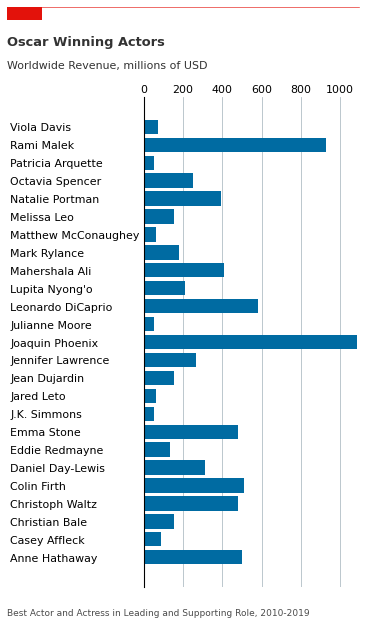

In [41]:
# Setup plot size. (w, h)- this also 
fig, ax = plt.subplots(figsize=(4,9))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
actor =just_actors2['name']
money = just_actors2['Adjusted Worldwide']/1000000

# Plot data
ax.barh(actor, money, color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 200, 400, 600, 800, 1000])
ax.set_xticklabels([0, 200, 400, 600, 800, 1000])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(actor,ha = 'left')           

ax.yaxis.set_tick_params(pad=130,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left


# Add in line and tag
ax.plot([-.35, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

ax.text(x=-.35, y=.96, s="Oscar Winning Actors", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="Worldwide Revenue, millions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=-.35, y=.08, s="""Best Actor and Actress in Leading and Supporting Role, 2010-2019""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)


plt.savefig('images_out/actors.png',    # Set path and filename
            dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')                  # Set background color to white

plt.show()

# Oscar Winning Films

In [42]:
#merge oscars df with all movies outer to include non winners
mergeall=pd.merge(movies_df, oscars_df, how="outer", on=["title", "year"])
#change NaN to 0 to get 0 for the non nominated movies instead of NaN 
mergeall=mergeall.fillna(0)
mergeall.head()

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,...,Adjusted Budget,year_ceremony,ceremony,category,name,winner,loser,winner_ct,loser_ct,nominees
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,0,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,...,"$79,200,000.0",$0.0,$0.0,0,0,0,0,$0.0,$0.0,$0.0
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,...,"$93,060,000.0",$0.0,$0.0,0,0,0,0,$0.0,$0.0,$0.0
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,0,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,...,"$43,560,000.0",$0.0,$0.0,0,0,0,0,$0.0,$0.0,$0.0
3,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0","$1,991.0",$63.0,ACTOR IN A SUPPORTING ROLE,Al Pacino,False,True,$3.0,$4.0,$7.0
4,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0","$1,991.0",$63.0,ART DIRECTION,Art Direction: Richard Sylbert; Set Decorati...,True,False,$3.0,$4.0,$7.0


In [43]:
#groupby title to remove the films that have duplpicate entries due to oscar info
film_ct = mergeall[['title','winner_ct',"nominees", "Adjusted Worldwide"]].groupby("title").mean()
#only include movies that we have Worldwide income for
film_ct= film_ct.loc[(film_ct["Adjusted Worldwide"] >0)]
film_ct.head()

,winner_ct,nominees,Adjusted Worldwide
title,,,
10 Things I Hate About You,$0.0,$0.0,"$82,891,157.3"
"10,000 BC",$0.0,$0.0,"$323,741,041.2"
102 Dalmatians,$0.0,$1.0,"$275,417,656.5"
10th & Wolf,$0.0,$0.0,"$183,617.3"
12 Years a Slave,$3.0,$9.0,"$208,383,854.2"


In [44]:
#group films based on oscar results 
noms=film_ct.loc[film_ct['nominees'] >0,:]
multinoms=film_ct.loc[film_ct['nominees'] >1,:]
winners=film_ct.loc[film_ct['winner_ct'] >0,:]
multiwin=film_ct.loc[film_ct['winner_ct'] >1,:]
losers=film_ct.loc[film_ct['nominees'] == 0,:]


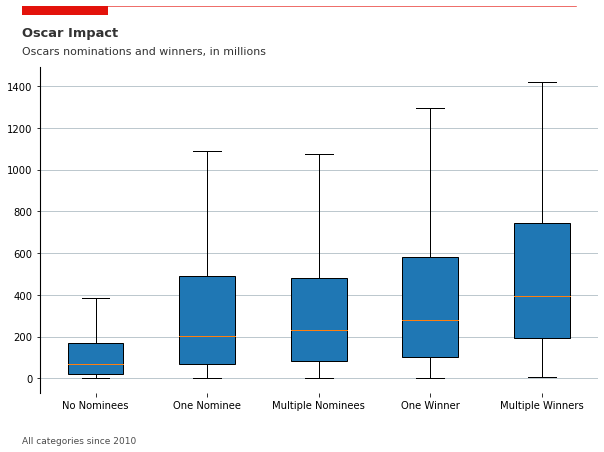

In [45]:
#First set variables for plot, calling on filtered groups above
datasets=[losers["Adjusted Worldwide"]/1000000, 
          noms["Adjusted Worldwide"]/1000000, 
          multinoms["Adjusted Worldwide"]/1000000, 
          winners["Adjusted Worldwide"]/1000000, 
          multiwin["Adjusted Worldwide"]/1000000]
labels = ['No Nominees','One Nominee', 'Multiple Nominees', 'One Winner', "Multiple Winners"]

#set variable & size for plot 
fig1, ax1 = plt.subplots(figsize=(10,6))

# Add in line and tag
ax1.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig1.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax1.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig1.transFigure, 
                           clip_on=False, 
                           linewidth = 0))



#Add Tiitle and subtitle
ax1.text(x=.1, y=.95, s="Oscar Impact ", transform=fig1.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax1.text(x=.1, y=.91, s="Oscars nominations and winners, in millions", transform=fig1.transFigure, ha='left', fontsize=11, alpha=.8)

# Remove splines. Can be done one at a time or can slice with a list.
ax1.spines[['top','right','bottom']].set_visible(False)

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax1.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Make left spine slightly thicker
ax1.spines['left'].set_linewidth(1.1)
ax1.spines['left'].set_linewidth(1.1)

#Plot it
ax1.boxplot(datasets, labels=labels,patch_artist=True,showfliers=False, zorder=2)

#add lower text
ax1.text(x=.1, y=0.01, s="""All categories since 2010""", transform=fig1.transFigure, ha='left', fontsize=9, alpha=.7)



plt.savefig("images_out/Boxplot.png",dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')

plt.show()

# Oscar Pies

In [56]:

cleaned = pd.read_csv('resources/movies_clean.csv')
cleaned=cleaned.rename(columns={"name":"title"})
cleaned.head()


,title,rating,genre,year,score,budget,gross,runtime
0,The Shining,R,Drama,1980,$8.4,"$19,000,000.0","$46,998,772.0",$146.0
1,The Blue Lagoon,R,Adventure,1980,$5.8,"$4,500,000.0","$58,853,106.0",$104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,$8.7,"$18,000,000.0","$538,375,067.0",$124.0
3,Airplane!,PG,Comedy,1980,$7.7,"$3,500,000.0","$83,453,539.0",$88.0
4,Caddyshack,R,Comedy,1980,$7.3,"$6,000,000.0","$39,846,344.0",$98.0


In [57]:
oscars_df.head()

,year,year_ceremony,ceremony,category,name,title,winner,loser,winner_ct,loser_ct,nominees
0,1980,1981,53,ACTOR IN A LEADING ROLE,Robert De Niro,Raging Bull,True,False,2,6,8
1,1980,1981,53,ACTOR IN A SUPPORTING ROLE,Joe Pesci,Raging Bull,False,True,2,6,8
2,1980,1981,53,ACTRESS IN A SUPPORTING ROLE,Cathy Moriarty,Raging Bull,False,True,2,6,8
3,1980,1981,53,CINEMATOGRAPHY,Michael Chapman,Raging Bull,False,True,2,6,8
4,1980,1981,53,DIRECTING,Martin Scorsese,Raging Bull,False,True,2,6,8


In [48]:
new_merge = pd.merge(cleaned, oscars_df , on=["title", "year"])
new_merge

,title,rating,genre,year,score,budget,gross,runtime,year_ceremony,ceremony,category,name,winner,loser,winner_ct,loser_ct,nominees
0,The Blue Lagoon,R,Adventure,1980,$5.8,"$4,500,000.0","$58,853,106.0",$104.0,1981,53,CINEMATOGRAPHY,Nestor Almendros,False,True,0,1,1
1,Raging Bull,R,Biography,1980,$8.2,"$18,000,000.0","$23,402,427.0",$129.0,1981,53,ACTOR IN A LEADING ROLE,Robert De Niro,True,False,2,6,8
2,Raging Bull,R,Biography,1980,$8.2,"$18,000,000.0","$23,402,427.0",$129.0,1981,53,ACTOR IN A SUPPORTING ROLE,Joe Pesci,False,True,2,6,8
3,Raging Bull,R,Biography,1980,$8.2,"$18,000,000.0","$23,402,427.0",$129.0,1981,53,ACTRESS IN A SUPPORTING ROLE,Cathy Moriarty,False,True,2,6,8
4,Raging Bull,R,Biography,1980,$8.2,"$18,000,000.0","$23,402,427.0",$129.0,1981,53,CINEMATOGRAPHY,Michael Chapman,False,True,2,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,A Beautiful Day in the Neighborhood,PG,Biography,2019,$7.3,"$25,000,000.0","$67,760,877.0",$109.0,2020,92,ACTOR IN A SUPPORTING ROLE,Tom Hanks,False,True,0,1,1
3143,How to Train Your Dragon: The Hidden World,PG,Animation,2019,$7.5,"$129,000,000.0","$525,683,457.0",$104.0,2020,92,ANIMATED FEATURE FILM,"Dean DeBlois, Bradford Lewis and Bonnie Arnold",False,True,0,1,1
3144,Maleficent: Mistress of Evil,PG,Adventure,2019,$6.6,"$185,000,000.0","$491,730,089.0",$119.0,2020,92,MAKEUP AND HAIRSTYLING,"Paul Gooch, Arjen Tuiten and David White",False,True,0,1,1
3145,Missing Link,PG,Animation,2019,$6.7,"$100,000,000.0","$26,565,710.0",$93.0,2020,92,ANIMATED FEATURE FILM,"Chris Butler, Arianne Sutner and Travis Knight",False,True,0,1,1


In [49]:
best_pictures = new_merge.loc[(new_merge['year'] ==2017)&((new_merge['category'] == 'BEST PICTURE')), :].sort_values('gross', ascending = False).head(5)
best_pictures

,title,rating,genre,year,score,budget,gross,runtime,year_ceremony,ceremony,category,name,winner,loser,winner_ct,loser_ct,nominees
2933,Dunkirk,PG-13,Action,2017,$7.8,"$100,000,000.0","$527,016,307.0",$106.0,2018,90,BEST PICTURE,"Emma Thomas and Christopher Nolan, Producers",False,True,3,5,8
2927,Get Out,R,Horror,2017,$7.7,"$4,500,000.0","$255,589,157.0",$104.0,2018,90,BEST PICTURE,"Sean McKittrick, Jason Blum, Edward H. Hamm Jr...",False,True,1,3,4
2953,The Shape of Water,R,Adventure,2017,$7.3,"$19,400,000.0","$195,333,312.0",$123.0,2018,90,BEST PICTURE,"Guillermo del Toro and J. Miles Dale, Producers",True,False,4,9,13
2982,The Post,PG-13,Drama,2017,$7.2,"$50,000,000.0","$180,419,231.0",$116.0,2018,90,BEST PICTURE,"Amy Pascal, Steven Spielberg and Kristie Macos...",False,True,0,2,2
2912,Darkest Hour,PG-13,Biography,2017,$7.4,"$30,000,000.0","$150,847,274.0",$125.0,2018,90,BEST PICTURE,"Tim Bevan, Eric Fellner, Lisa Bruce, Anthony M...",False,True,2,4,6


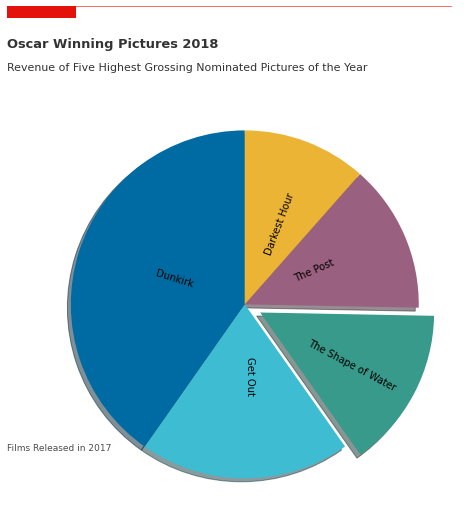

In [50]:
best_pictures = new_merge.loc[(new_merge['year'] ==2017)&((new_merge['category'] == 'BEST PICTURE')), :].sort_values('gross', ascending = False).head(5)
#best_pictures

#set custom colors for our plots, will use in all cells below
colors=['#006BA2','#3EBCD2','#379A8B', '#9A607F','#EBB434']

#set variable & size for plot (square in this case since we have a circle to go into it)
fig1, ax1 = plt.subplots(figsize=(8,8))


# Add in line and tag
ax1.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig1.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax1.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig1.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

#hide the square that we are dropping the pie plot into
#this allows us to have consistent "branding" of graphics
ax1.spines[['top','right','bottom', 'left']].set_visible(False)

#Add Tiitle and subtitle
ax1.text(x=.1, y=.95, s="Oscar Winning Pictures 2018", transform=fig1.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax1.text(x=.1, y=.91, s="Revenue of Five Highest Grossing Nominated Pictures of the Year", transform=fig1.transFigure, ha='left', fontsize=11, alpha=.8)

#Plot it
ax1.pie(best_pictures['gross'],labels=best_pictures['title'],labeldistance=.3, explode = [0,0,.1,0,0], 
        colors=colors, startangle=90, shadow=True,rotatelabels=True)

#add lower text
ax1.text(x=.1, y=0.25, s="""Films Released in 2017""", transform=fig1.transFigure, ha='left', fontsize=9, alpha=.7)



#explode = [0,0,.1,0,0]explode = [0,0,.1,0,0]
#best_pictures.set_index('title').plot.pie(y='gross', legend=False, explode = explode, startangle=90, shadow=True,autopct='%1.2f%%')
#plt.axis('equal')
#plt.ylabel('Percentage of Revenue')
#plt.title("2018 Oscars Top 5 Grossing Best Picture Nominees")
plt.savefig('images_out/2018_Oscars.png',dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')
plt.show()

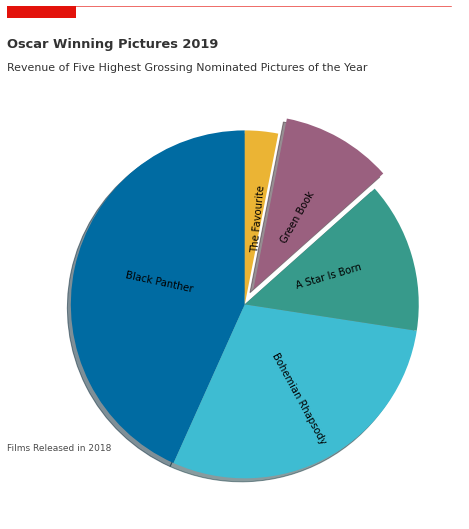

In [51]:
#get our data to plot
best_pictures18 = new_merge.loc[(new_merge['year'] ==2018)&((new_merge['category'] == 'BEST PICTURE')), :].sort_values('gross', ascending = False).head(5)

#set variable & size for plot 
fig1, ax1 = plt.subplots(figsize=(8,8))

# Add in line and tag
ax1.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig1.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax1.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig1.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

#hide the square that we are dropping the pie plot into
#this allows us to have consistent "branding" of graphics
ax1.spines[['top','right','bottom', 'left']].set_visible(False)

#Add Tiitle and subtitle
ax1.text(x=.1, y=.95, s="Oscar Winning Pictures 2019", transform=fig1.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax1.text(x=.1, y=.91, s="Revenue of Five Highest Grossing Nominated Pictures of the Year", transform=fig1.transFigure, ha='left', fontsize=11, alpha=.8)

#Plot it
ax1.pie(best_pictures18['gross'],labels=best_pictures18['title'],labeldistance=.3, explode = [0,0,0,.1,0], 
        colors=colors, startangle=90, shadow=True,rotatelabels=True)

#add lower text
ax1.text(x=.1, y=0.25, s="""Films Released in 2018""", transform=fig1.transFigure, ha='left', fontsize=9, alpha=.7)



#explode = [0,0,0,.1,0]
#best_pictures.set_index('title').plot.pie(y='gross', legend=False, explode = explode, startangle=90, shadow=True,autopct='%1.2f%%')
#plt.axis('equal')
#plt.ylabel('Percentage of Revenue')
#plt.title("2019 Oscars Top 5 Grossing Best Picture Nominees")
plt.savefig('images_out/2019_Oscars.png', dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')
plt.show()

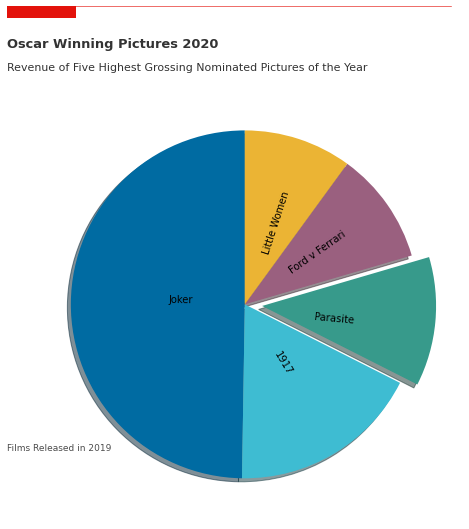

In [52]:
#get our data to plot
best_pictures19 = new_merge.loc[(new_merge['year'] ==2019)&((new_merge['category'] == 'BEST PICTURE')), :].sort_values('gross', ascending = False).head(5)

#set variable & size for plot 
fig1, ax1 = plt.subplots(figsize=(8,8))

# Add in line and tag
ax1.plot([.1, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig1.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax1.add_patch(plt.Rectangle((.1,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig1.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

#hide the square that we are dropping the pie plot into
#this allows us to have consistent "branding" of graphics
ax1.spines[['top','right','bottom', 'left']].set_visible(False)

#Add Tiitle and subtitle
ax1.text(x=.1, y=.95, s="Oscar Winning Pictures 2020", transform=fig1.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax1.text(x=.1, y=.91, s="Revenue of Five Highest Grossing Nominated Pictures of the Year", transform=fig1.transFigure, ha='left', fontsize=11, alpha=.8)

#Plot it
ax1.pie(best_pictures19['gross'],labels=best_pictures19['title'],labeldistance=.3, explode = [0,0,.1,0,0], 
        colors=colors, startangle=90, shadow=True,rotatelabels=True)

#add lower text
ax1.text(x=.1, y=0.25, s="""Films Released in 2019""", transform=fig1.transFigure, ha='left', fontsize=9, alpha=.7)
#explode = [0,0,.1,0,0]
#best_pictures.set_index('title').plot.pie(y='gross', legend=False, explode = explode, startangle=90, shadow=True,autopct='%1.2f%%')
#plt.axis('equal')
#plt.ylabel('Percentage of Revenue')
#plt.title("2020 Oscars Top 5 Grossing Best Picture Nominees")
plt.savefig('images_out/2020_Oscars.png', dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')
plt.show()